In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
#df = pd.read_csv('investments_VC.csv', encoding= 'unicode_escape')
df = pd.read_csv('funding_rounds.csv')
dfo = pd.read_csv('funding_rounds.csv')

In [5]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [6]:
dfo.shape

(52928, 23)

In [7]:
dfo.head(3)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23


# CLEANING

In [8]:
#df = df.dropna(subset=['name'])
#dfo = dfo.pivot_table(index=['id','post_money_valuation'], columns='funding_round_type', values='raised_amount')
dfo = dfo.pivot_table(index=['id','post_money_valuation', 'pre_money_valuation', 'participants'], columns='funding_round_type', values='raised_amount')

In [9]:
# Replace NaN's with zero
dfo.fillna(value=0, inplace=True)

In [10]:
dfo.head(10)

,,,funding_round_type,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
id,post_money_valuation,pre_money_valuation,participants,,,,,,,,,
1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
4,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
5,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0
6,10000000.0,8500000.0,1,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0
7,110000000.0,100000000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,0.0,0.0
8,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0
9,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,6300000.0,0.0,0.0,0.0


In [11]:
dfo.reset_index(inplace=True)
dfo.set_index('id')

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
id,,,,,,,,,,,,
1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
4,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
5,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57948,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,3000000.0,0.0,0.0,0.0
57949,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570000.0
57950,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2184100.0


In [12]:
dfo.index

RangeIndex(start=0, stop=52928, step=1)

In [13]:
dfo.head(5)

funding_round_type,id,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
0,1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
1,2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
3,4,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
4,5,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0


In [14]:
dfo.drop('id', inplace=True, axis=1)

In [15]:
dfo.describe()

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
count,5.292800e+04,5.292800e+04,52928.000000,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04
mean,1.862279e+06,3.294525e+05,1.528567,7.949544e+04,3.277511e+03,8.902244e+05,2.784142e+05,4.919190e+05,1.164014e+06,1.062597e+06,1.680002e+06,2.406176e+06
std,1.287686e+08,6.531803e+07,2.060192,3.307221e+05,1.699208e+05,2.888538e+07,1.858552e+07,1.486710e+07,1.037682e+07,6.281118e+06,1.080340e+07,1.987085e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+05
max,2.432423e+10,1.500000e+10,36.000000,3.100000e+07,2.000000e+07,3.835050e+09,3.200000e+09,2.600000e+09,1.300000e+09,5.700000e+08,9.500000e+08,3.000000e+09


In [16]:
dfo.dtypes

funding_round_type
post_money_valuation    float64
pre_money_valuation     float64
participants              int64
angel                   float64
crowdfunding            float64
other                   float64
post-ipo                float64
private-equity          float64
series-a                float64
series-b                float64
series-c+               float64
venture                 float64
dtype: object

In [17]:
dfo.columns

Index(['post_money_valuation', 'pre_money_valuation', 'participants', 'angel',
       'crowdfunding', 'other', 'post-ipo', 'private-equity', 'series-a',
       'series-b', 'series-c+', 'venture'],
      dtype='object', name='funding_round_type')

In [18]:
dfo.corr()

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
funding_round_type,,,,,,,,,,,,
post_money_valuation,1.000000,-0.000015,0.000451,-0.002382,-0.000267,-0.000444,-0.000135,0.011450,-0.000218,0.001693,0.074543,0.011774
pre_money_valuation,-0.000015,1.000000,-0.000708,-0.001208,-0.000097,-0.000155,-0.000076,-0.000167,-0.000506,0.000381,0.096757,-0.000600
participants,0.000451,-0.000708,1.000000,0.022200,-0.013145,-0.015762,0.006626,-0.005017,0.033787,0.124180,0.174112,0.011619
angel,-0.002382,-0.001208,0.022200,1.000000,-0.004636,-0.007408,-0.003601,-0.007953,-0.026964,-0.040665,-0.037380,-0.029107
crowdfunding,-0.000267,-0.000097,-0.013145,-0.004636,1.000000,-0.000594,-0.000289,-0.000638,-0.002164,-0.003263,-0.003000,-0.002336
other,-0.000444,-0.000155,-0.015762,-0.007408,-0.000594,1.000000,-0.000462,-0.001020,-0.003457,-0.005214,-0.004793,-0.003732
post-ipo,-0.000135,-0.000076,0.006626,-0.003601,-0.000289,-0.000462,1.000000,-0.000496,-0.001680,-0.002534,-0.002330,-0.001814
private-equity,0.011450,-0.000167,-0.005017,-0.007953,-0.000638,-0.001020,-0.000496,1.000000,-0.003712,-0.005598,-0.005145,-0.004007
series-a,-0.000218,-0.000506,0.033787,-0.026964,-0.002164,-0.003457,-0.001680,-0.003712,1.000000,-0.018977,-0.017444,-0.013584


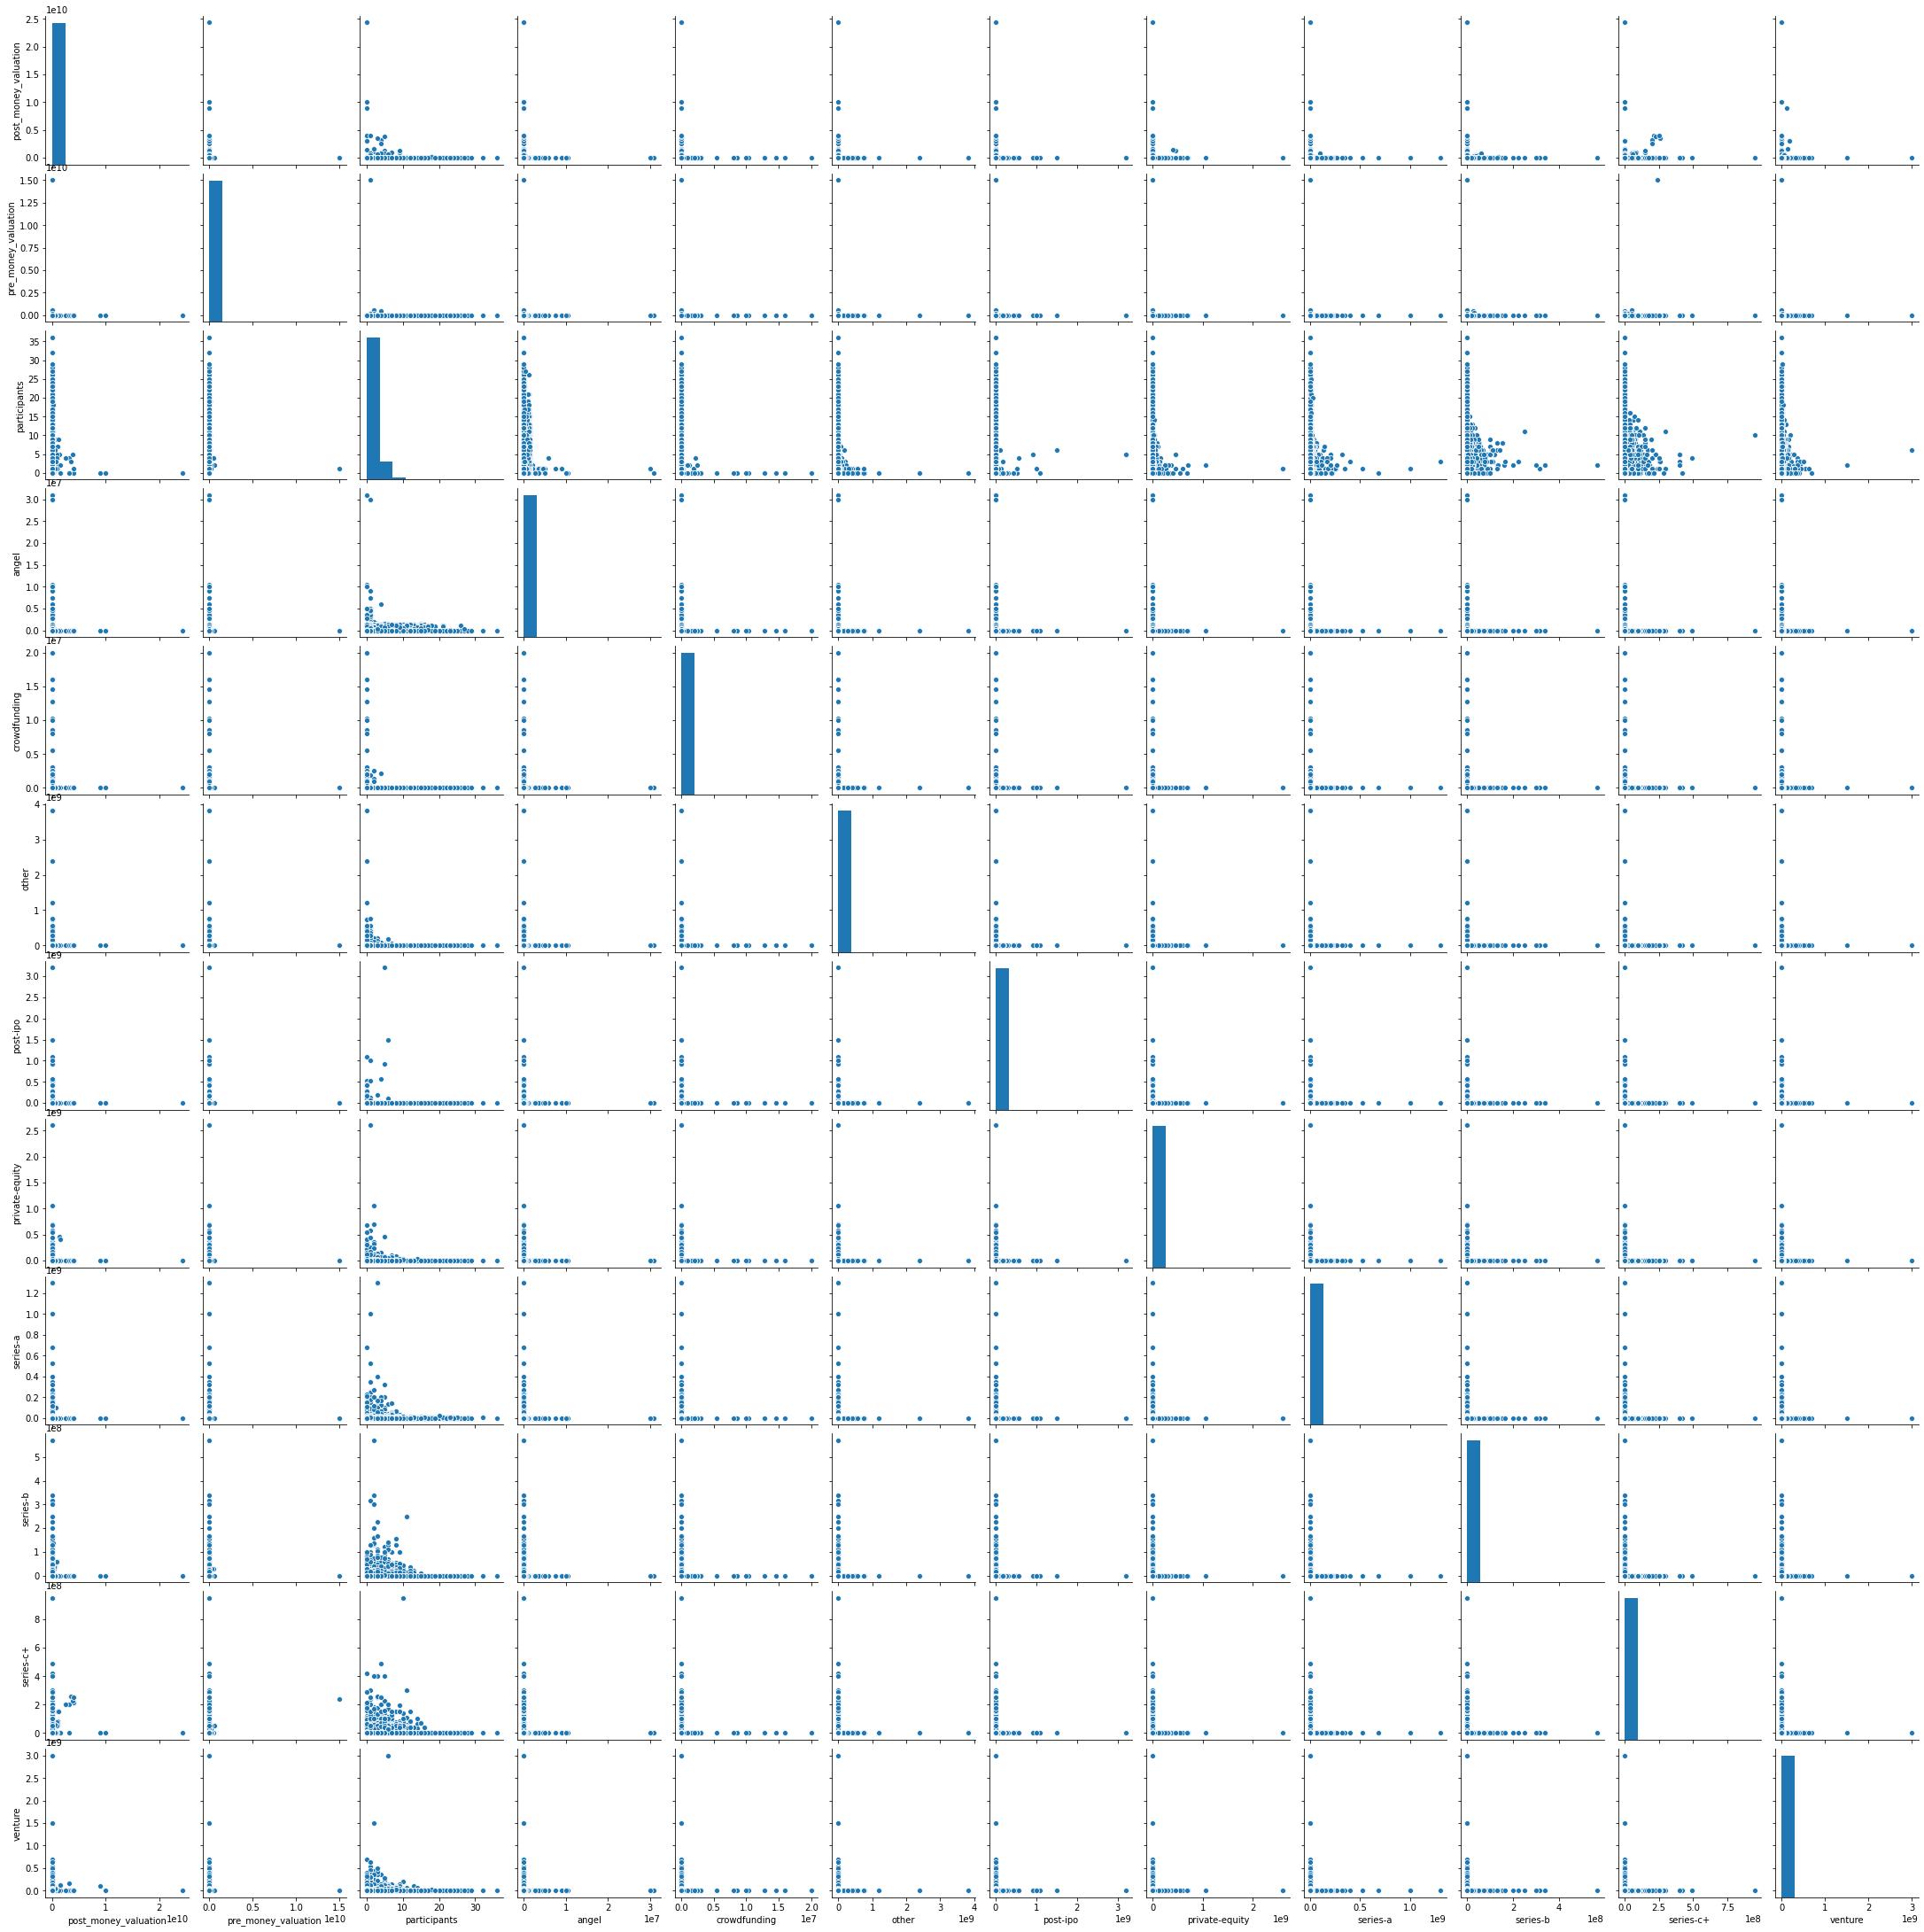

In [19]:
sns.pairplot(dfo)

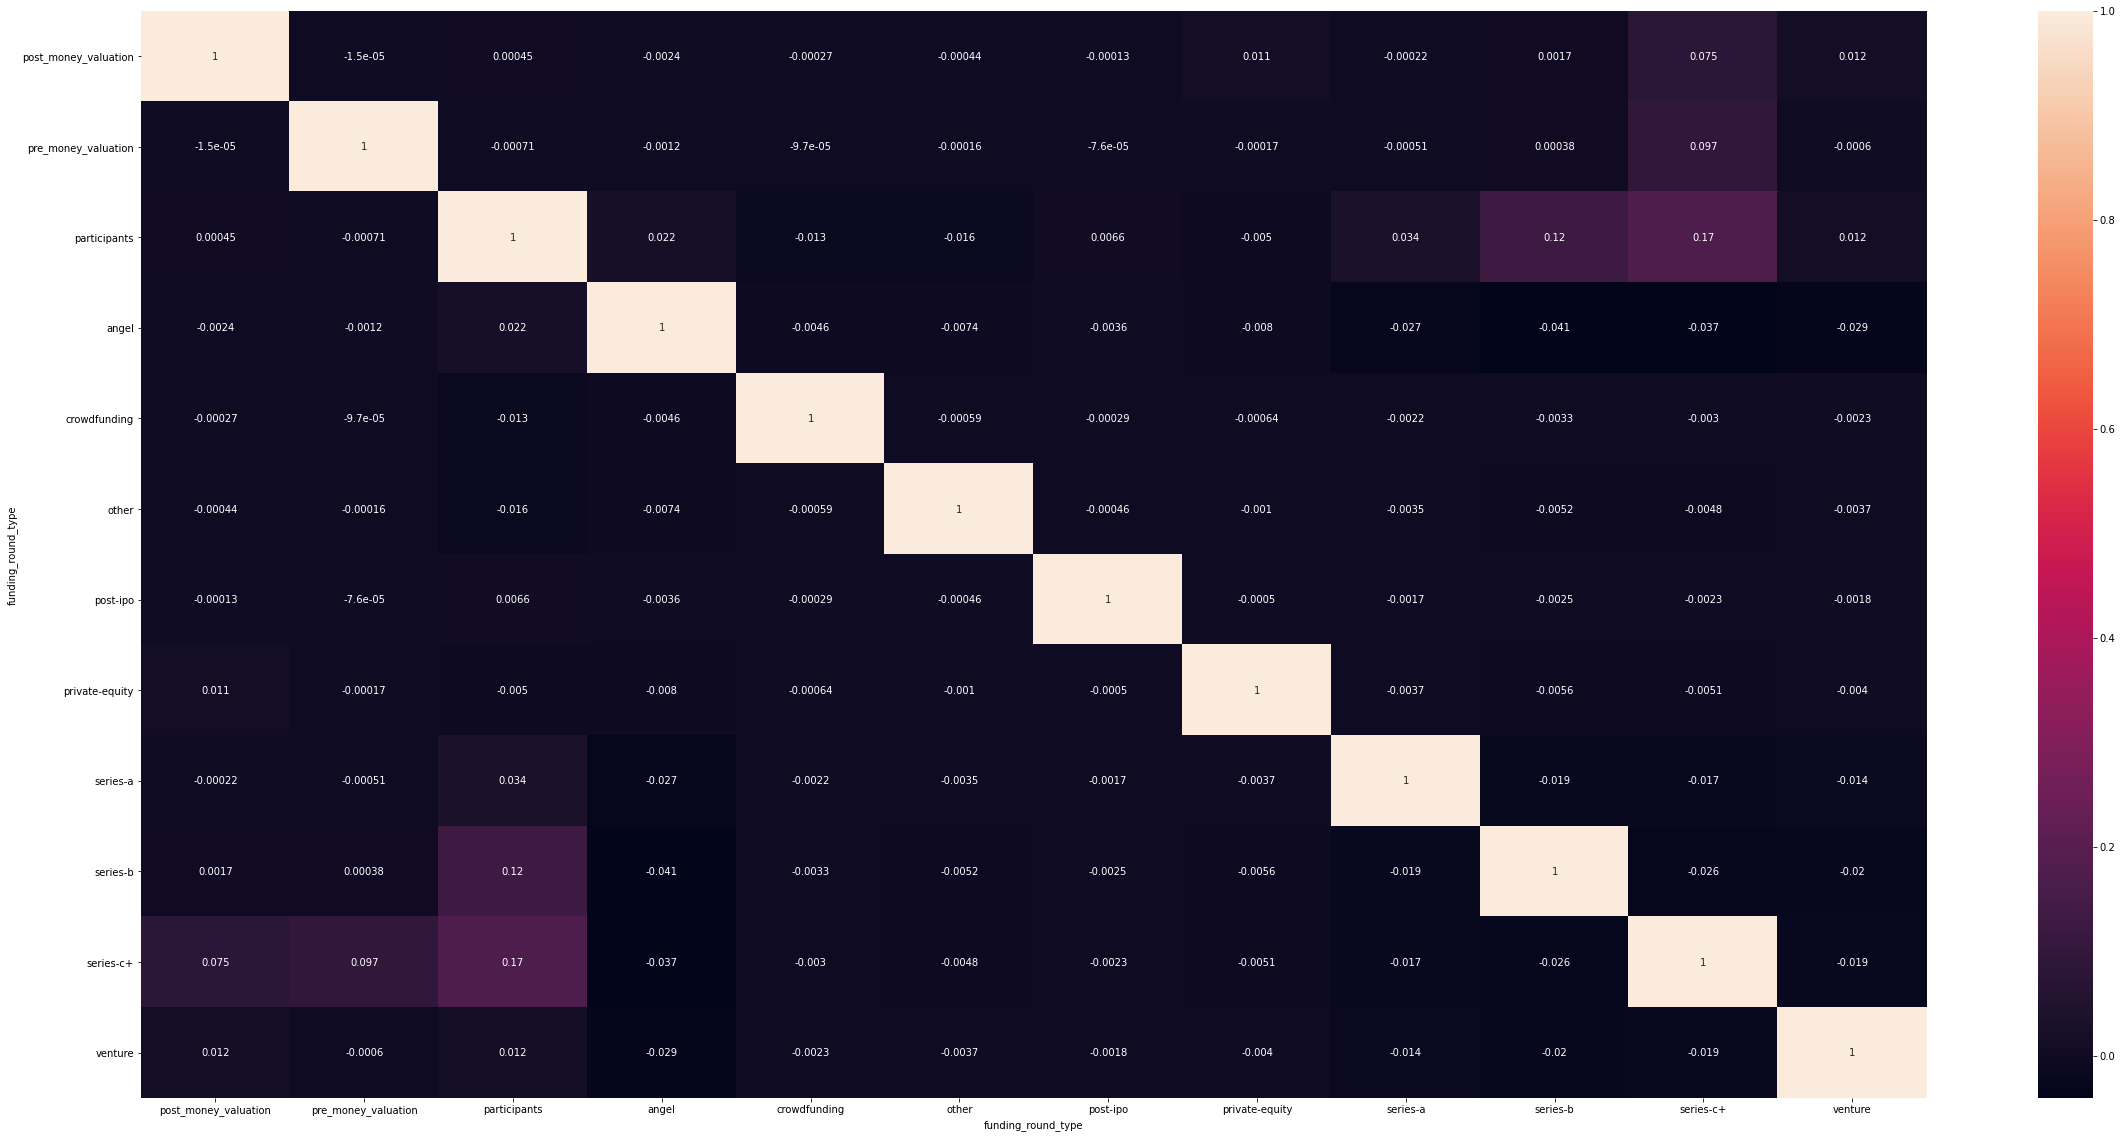

In [20]:
plt.figure(figsize=(40,20))
sns.heatmap(dfo.corr(), annot=True)

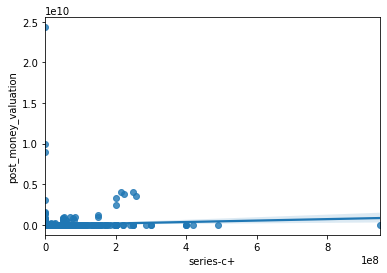

In [21]:
sns.regplot(x='series-c+', y='post_money_valuation', data=dfo)

In [22]:
#drop all post value entries with zero value as it skews correlation matrix
#dfo = dfo[dfo.post_money_valuation != 0]

In [23]:
dfo.corr()

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
funding_round_type,,,,,,,,,,,,
post_money_valuation,1.000000,-0.000015,0.000451,-0.002382,-0.000267,-0.000444,-0.000135,0.011450,-0.000218,0.001693,0.074543,0.011774
pre_money_valuation,-0.000015,1.000000,-0.000708,-0.001208,-0.000097,-0.000155,-0.000076,-0.000167,-0.000506,0.000381,0.096757,-0.000600
participants,0.000451,-0.000708,1.000000,0.022200,-0.013145,-0.015762,0.006626,-0.005017,0.033787,0.124180,0.174112,0.011619
angel,-0.002382,-0.001208,0.022200,1.000000,-0.004636,-0.007408,-0.003601,-0.007953,-0.026964,-0.040665,-0.037380,-0.029107
crowdfunding,-0.000267,-0.000097,-0.013145,-0.004636,1.000000,-0.000594,-0.000289,-0.000638,-0.002164,-0.003263,-0.003000,-0.002336
other,-0.000444,-0.000155,-0.015762,-0.007408,-0.000594,1.000000,-0.000462,-0.001020,-0.003457,-0.005214,-0.004793,-0.003732
post-ipo,-0.000135,-0.000076,0.006626,-0.003601,-0.000289,-0.000462,1.000000,-0.000496,-0.001680,-0.002534,-0.002330,-0.001814
private-equity,0.011450,-0.000167,-0.005017,-0.007953,-0.000638,-0.001020,-0.000496,1.000000,-0.003712,-0.005598,-0.005145,-0.004007
series-a,-0.000218,-0.000506,0.033787,-0.026964,-0.002164,-0.003457,-0.001680,-0.003712,1.000000,-0.018977,-0.017444,-0.013584


In [24]:
dfo.describe()

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
count,5.292800e+04,5.292800e+04,52928.000000,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04
mean,1.862279e+06,3.294525e+05,1.528567,7.949544e+04,3.277511e+03,8.902244e+05,2.784142e+05,4.919190e+05,1.164014e+06,1.062597e+06,1.680002e+06,2.406176e+06
std,1.287686e+08,6.531803e+07,2.060192,3.307221e+05,1.699208e+05,2.888538e+07,1.858552e+07,1.486710e+07,1.037682e+07,6.281118e+06,1.080340e+07,1.987085e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+05
max,2.432423e+10,1.500000e+10,36.000000,3.100000e+07,2.000000e+07,3.835050e+09,3.200000e+09,2.600000e+09,1.300000e+09,5.700000e+08,9.500000e+08,3.000000e+09


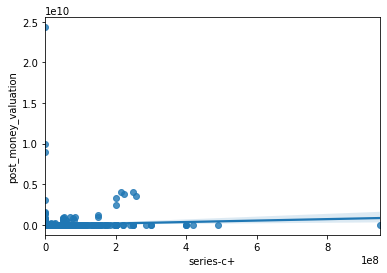

In [25]:
sns.regplot(x='series-c+', y='post_money_valuation', data=dfo)

In [26]:
dfo.head(5)

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
1,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
3,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
4,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0


In [27]:
df.head(5)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,525000000.0,USD,0.0,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [28]:
dfoffice = pd.read_csv('offices.csv')
#dfmerged1 = df.merge(dfoffice, on='object_id', how='inner')
dfipos = pd.read_csv('ipos.csv')
#dfmerged2 = dfmerged1.merge(dfipos, on='object_id', how='outer')
dfobjects = pd.read_csv('objects.csv')
#dfmerged3 = pd.merge(dfmerged2, dfobjects, left_on='object_id', right_on='id', how='inner')



/Users/omniverse/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
dfmerged1 = df.merge(dfipos, on='object_id', how='outer')

In [30]:
dfmerged1

,id_x,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount_x,raised_currency_code_x,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url_x,source_description_x,created_by,created_at_x,updated_at_x,id_y,ipo_id,valuation_amount,valuation_currency_code,raised_amount_y,raised_currency_code_y,public_at,stock_symbol,source_url_y,source_description_y,created_at_y,updated_at_y
0,1.0,1.0,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2.0,0.0,0.0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.0,85.0,c:4,2005-10-01,series-a,a,2800000.0,2800000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,8.0,0.0,1.0,http://goliath.ecnext.com/coms2/gi_0199-485778...,NaN,initial-importer,2007-07-04 04:56:09,2008-02-27 23:14:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3503.0,3503.0,c:4,2008-09-24,series-c+,c,28700000.0,28700000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,4.0,0.0,0.0,http://www.techcrunch.com/2008/09/24/spurned-b...,press release,erick,2008-09-24 18:17:38,2009-04-21 05:03:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24136.0,24136.0,c:4,2011-07-12,series-c+,d,5000000.0,5000000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,0.0,1.0,0.0,http://techcrunch.com/2011/07/12/digg-raises-a...,Digg Raises An Inside Venture Round,mike,2011-07-12 21:40:21,2011-07-13 00:37:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2.0,0.0,1.0,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23,784.0,847.0,1.040000e+11,USD,1.840000e+10,USD,2012-05-18,NASDAQ:FB,http://online.wsj.com/news/articles/SB10001424...,Facebook Prices IPO at Record Value,2012-05-19 01:19:41,2013-11-21 19:40:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53658,NaN,NaN,c:258527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.0,1369.0,0.000000e+00,USD,0.000000e+00,USD,NaN,NYSE:MRC,NaN,NaN,2013-12-11 03:42:45,2013-12-11 03:42:45
53659,NaN,NaN,c:152753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1254.0,1371.0,0.000000e+00,USD,0.000000e+00,USD,1985-12-05,NASDAQ:COST,http://phx.corporate-ir.net/phoenix.zhtml?c=83...,Costco Investor Relations,2013-12-11 23:28:07,2013-12-11 23:28:07
53660,NaN,NaN,c:267859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1255.0,1372.0,0.000000e+00,USD,0.000000e+00,USD,NaN,NYSE:EBS,NaN,NaN,2013-12-12 05:42:06,2013-12-12 05:42:06
53661,NaN,NaN,c:39330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256.0,1373.0,0.000000e+00,USD,7.250000e+08,USD,2013-12-11,NYSE:ARMK,http://www.reuters.com/article/2013/12/11/aram...,Food services firm Aramark raises $725 mln in ...,2013-12-12 07:08:45,2013-12-12 07:19:44


In [31]:
#dfmerged3.drop(['id_x','funding_round_id','object_id','funding_round_code','raised_amount_x','raised_currency_code_x','pre_money_valuation_usd','pre_money_currency_code','post_money_valuation_usd','post_money_currency_code','source_url_x','source_description_x','id_y office_id','address1','address2','created_at_y','updated_at_y','id_x','valuation_currency_code','raised_currency_code_y','stock_symbol','source_url_y','source_description_y','created_at_x','updated_at_x','id_y','entity_id','parent_id','name','normalized_name','permalink','domain','homepage_url','twitter_username','logo_url','logo_width','logo_height','short_description','description_y','overview','tag_list','country_code_y','state_code_y','city_y','region_y','created_by_y'], inplace=True, axis=1)

In [32]:
dfmerged1.drop(['id_x','funding_round_id','funding_round_code','raised_amount_x','raised_currency_code_x','pre_money_valuation_usd','pre_money_currency_code','post_money_valuation_usd','post_money_currency_code','source_url_x','source_description_x','created_by','created_at_x','updated_at_x','id_y', 'raised_currency_code_y','stock_symbol','source_url_y','source_description_y', 'created_at_y', 'updated_at_y'], inplace=True, axis=1)

In [33]:
dfoffice.drop(['id', 'office_id', 'description','address1','address2','state_code','created_at', 'updated_at'], inplace=True, axis=1)

In [34]:
dfmerged2 = dfmerged1.merge(dfoffice, on='object_id', how='inner')

In [35]:
dfmerged2.drop(['object_id', 'funded_at', 'zip_code', 'country_code', 'city','valuation_currency_code', 'public_at'], inplace=True, axis=1)

In [36]:
dfmerged2.head(50)

,funding_round_type,raised_amount_usd,pre_money_valuation,post_money_valuation,participants,is_first_round,is_last_round,ipo_id,valuation_amount,raised_amount_y,region,latitude,longitude
0,series-b,8.500000e+06,0.000000e+00,0.0,2.0,0.0,0.0,NaN,NaN,NaN,SF Bay,37.764726,-122.394523
1,series-a,2.800000e+06,0.000000e+00,0.0,8.0,0.0,1.0,NaN,NaN,NaN,SF Bay,37.764726,-122.394523
2,series-c+,2.870000e+07,0.000000e+00,0.0,4.0,0.0,0.0,NaN,NaN,NaN,SF Bay,37.764726,-122.394523
3,series-c+,5.000000e+06,0.000000e+00,0.0,0.0,1.0,0.0,NaN,NaN,NaN,SF Bay,37.764726,-122.394523
4,angel,5.000000e+05,0.000000e+00,0.0,2.0,0.0,1.0,847.0,1.040000e+11,1.840000e+10,SF Bay,37.416050,-122.151801
5,angel,5.000000e+05,0.000000e+00,0.0,2.0,0.0,1.0,847.0,1.040000e+11,1.840000e+10,Dublin,53.344104,-6.267494
6,angel,5.000000e+05,0.000000e+00,0.0,2.0,0.0,1.0,847.0,1.040000e+11,1.840000e+10,New York,40.755716,-73.979247
7,series-a,1.270000e+07,1.150000e+08,0.0,3.0,0.0,0.0,847.0,1.040000e+11,1.840000e+10,SF Bay,37.416050,-122.151801
8,series-a,1.270000e+07,1.150000e+08,0.0,3.0,0.0,0.0,847.0,1.040000e+11,1.840000e+10,Dublin,53.344104,-6.267494
9,series-a,1.270000e+07,1.150000e+08,0.0,3.0,0.0,0.0,847.0,1.040000e+11,1.840000e+10,New York,40.755716,-73.979247


In [37]:
dfmerged2['funding_round_type'].fillna('other', inplace=True)

In [38]:
dfmerged2.dropna(subset=['is_first_round'], how='all', inplace=True)

In [39]:
#dfmerged2.dropna(subset=['city'], how='all', inplace=True)

In [40]:
#dfmerged2.dropna(subset=['zip_code'], how='all', inplace=True)

In [41]:
dfmerged2.drop(['latitude','longitude'], inplace=True, axis=1)

In [42]:
#dfmerged2['ipo_id'] = dfmerged2['ipo_id'].astype(str)

In [43]:
#dfmerged2.replace('\d+', 1, regex=True)
#dfmerged2.replace('nan', 0)

In [44]:
#dfmerged2.fillna(0)

In [45]:
dfmerged2.loc[dfmerged2['ipo_id'] > 1, 'ipo_id'] = 1


In [46]:
dfmerged2.fillna(0, inplace=True)

In [47]:
dfmerged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60903 entries, 0 to 60902
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funding_round_type    60903 non-null  object 
 1   raised_amount_usd     60903 non-null  float64
 2   pre_money_valuation   60903 non-null  float64
 3   post_money_valuation  60903 non-null  float64
 4   participants          60903 non-null  float64
 5   is_first_round        60903 non-null  float64
 6   is_last_round         60903 non-null  float64
 7   ipo_id                60903 non-null  float64
 8   valuation_amount      60903 non-null  float64
 9   raised_amount_y       60903 non-null  float64
 10  region                60903 non-null  object 
dtypes: float64(9), object(2)
memory usage: 5.6+ MB


# Create dummy or indicator features for categorical variables

In [48]:
dfobj=dfmerged2.select_dtypes(include=['object'])

In [49]:
dfmergeddum = pd.concat([dfmerged2.drop(dfobj, axis=1), pd.get_dummies(dfobj)], axis=1)

In [50]:
dfmergeddum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60903 entries, 0 to 60902
Columns: 2832 entries, raised_amount_usd to region_xiamen
dtypes: float64(9), uint8(2823)
memory usage: 168.6 MB


In [51]:
dfp = dfmerged2[['participants','is_first_round','is_last_round','ipo_id']]
dfp = dfp.astype('int')

In [52]:
dfp.head(5)

,participants,is_first_round,is_last_round,ipo_id
0,2,0,0,0
1,8,0,1,0
2,4,0,0,0
3,0,1,0,0
4,2,0,1,1


In [53]:
dffloat=dfmerged2.select_dtypes(include=['number'])

In [54]:
dffloat.drop(['participants','is_first_round','is_last_round','ipo_id'], axis=1, inplace=True)

/Users/omniverse/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
dffloat.head(5)

,raised_amount_usd,pre_money_valuation,post_money_valuation,valuation_amount,raised_amount_y
0,8500000.0,0.0,0.0,0.000000e+00,0.000000e+00
1,2800000.0,0.0,0.0,0.000000e+00,0.000000e+00
2,28700000.0,0.0,0.0,0.000000e+00,0.000000e+00
3,5000000.0,0.0,0.0,0.000000e+00,0.000000e+00
4,500000.0,0.0,0.0,1.040000e+11,1.840000e+10


# Standardize the magnitude of numeric features using a scaler

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
dfscaled = scaler.fit_transform(dffloat)

In [59]:
print(dfscaled)

[[-0.00471047 -0.00760268 -0.02356219 -0.0295726  -0.02666564]
 [-0.15029632 -0.00760268 -0.02356219 -0.0295726  -0.02666564]
 [ 0.51122535 -0.00760268 -0.02356219 -0.0295726  -0.02666564]
 ...
 [-0.14518805 -0.00760268 -0.02356219 -0.0295726  -0.02666564]
 [-0.20161449 -0.00760268 -0.02356219 -0.0295726  -0.02666564]
 [-0.21488408 -0.00760268 -0.02356219 -0.0295726  -0.02666564]]


In [60]:
dfscaled = pd.DataFrame(dfscaled, columns=dffloat.columns)

In [61]:
dfscaled.head(5)

,raised_amount_usd,pre_money_valuation,post_money_valuation,valuation_amount,raised_amount_y
0,-0.004710,-0.007603,-0.023562,-0.029573,-0.026666
1,-0.150296,-0.007603,-0.023562,-0.029573,-0.026666
2,0.511225,-0.007603,-0.023562,-0.029573,-0.026666
3,-0.094105,-0.007603,-0.023562,-0.029573,-0.026666
4,-0.209041,-0.007603,-0.023562,40.583737,42.846089


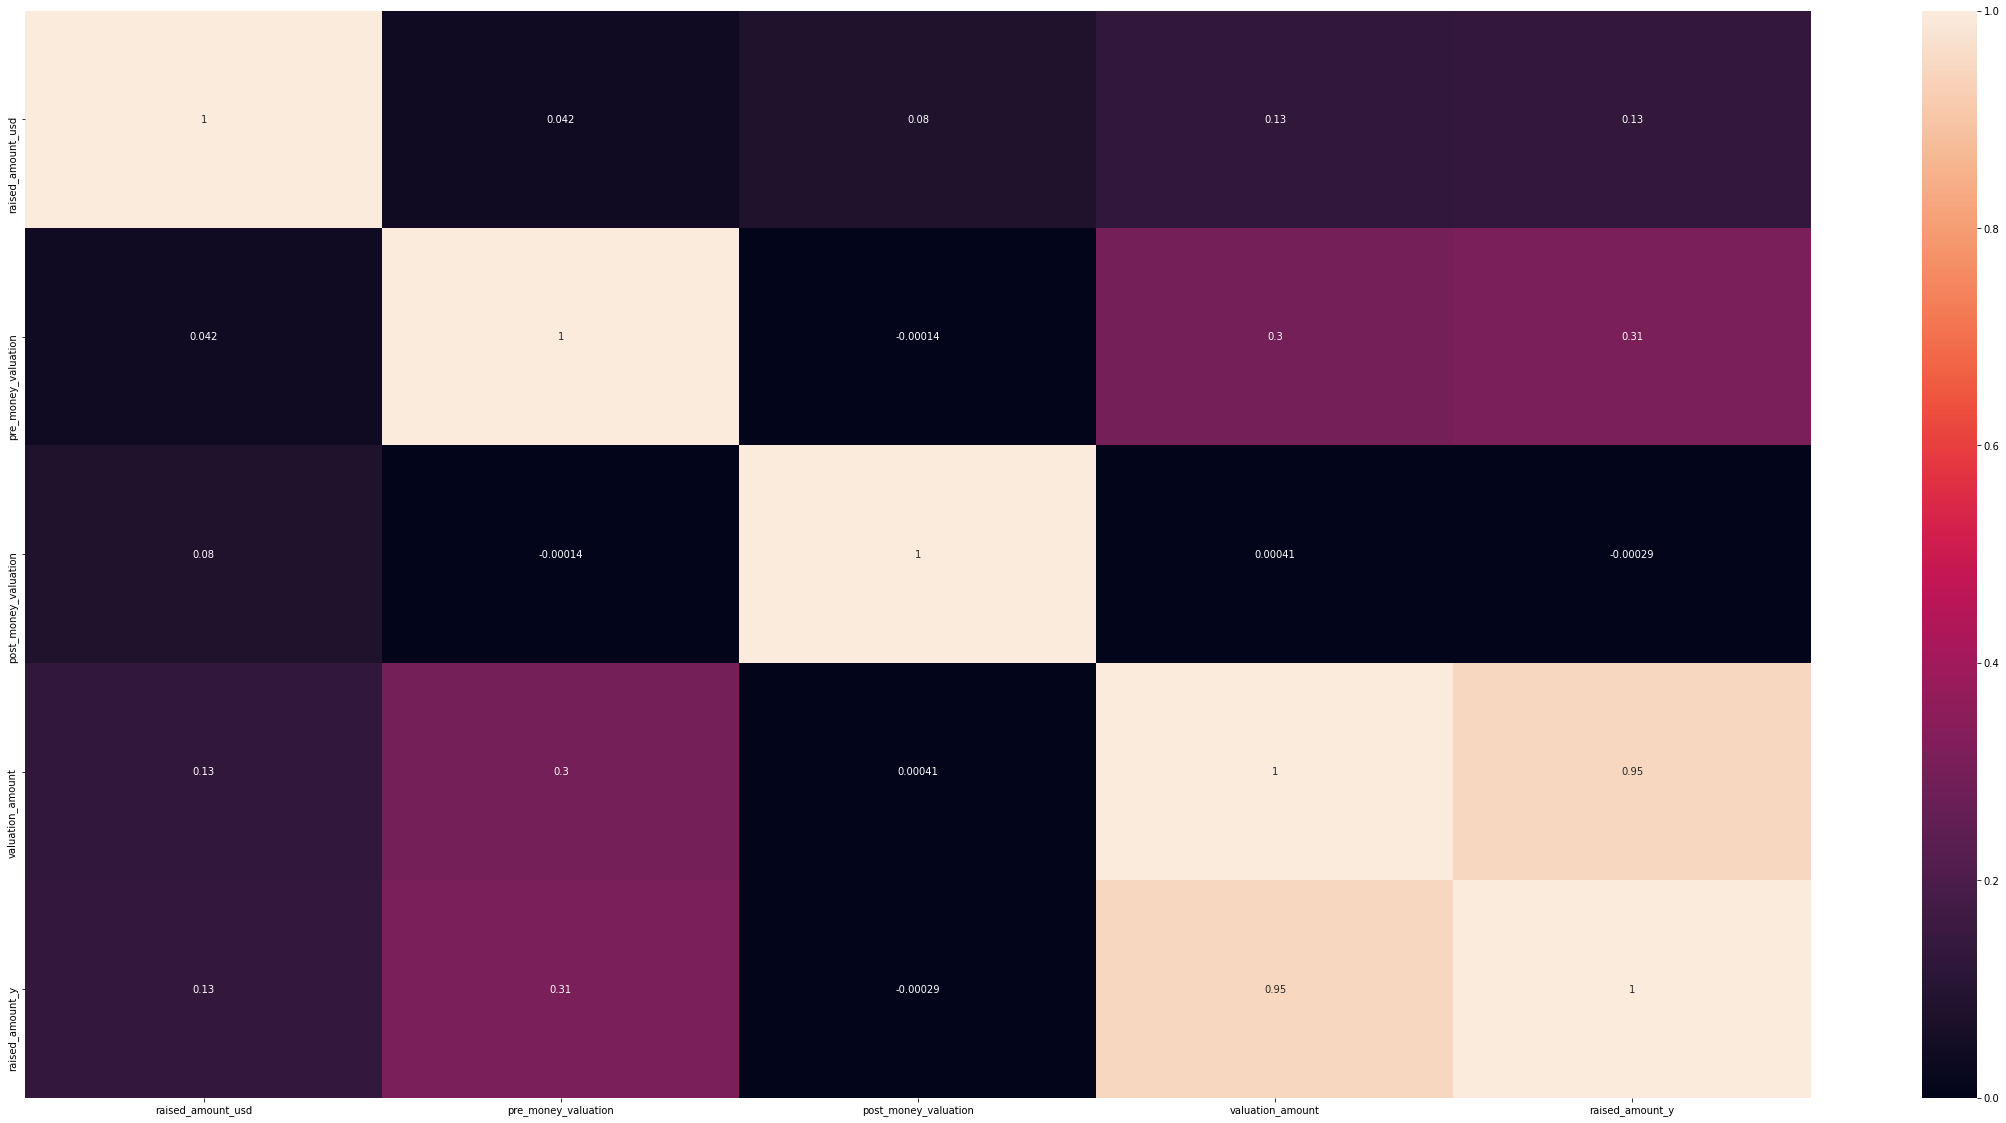

In [62]:
plt.figure(figsize=(40,20))
sns.heatmap(dfscaled.corr(), annot=True)

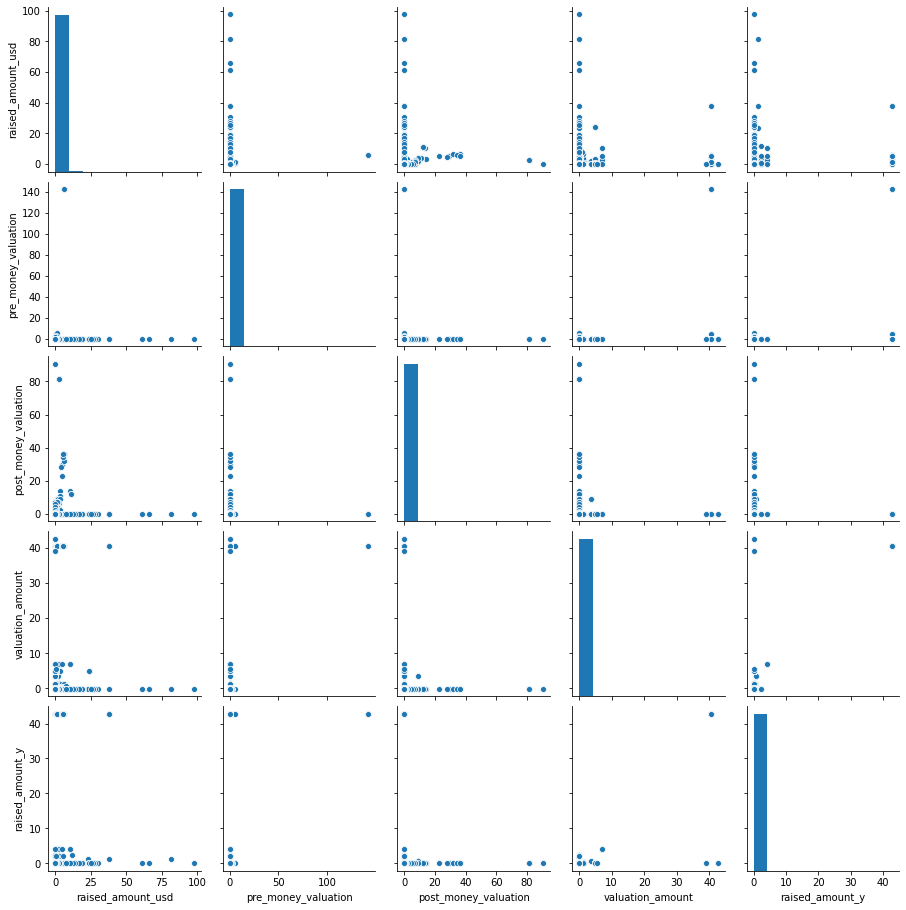

In [63]:
sns.pairplot(dfscaled)

In [64]:
dfmergedflt = pd.concat([dfmerged2.drop(dffloat, axis=1), dfscaled], axis=1)

In [65]:
dfdumscaledpre = pd.concat([dfscaled, dfp], axis=1)

In [66]:
dfdumscaled = pd.concat([dfdumscaledpre, pd.get_dummies(dfobj)], axis=1)

In [67]:
dfdumscaled.head(5)

raised_amount_usd  pre_money_valuation  post_money_valuation  \
0          -0.004710            -0.007603             -0.023562   
1          -0.150296            -0.007603             -0.023562   
2           0.511225            -0.007603             -0.023562   
3          -0.094105            -0.007603             -0.023562   
4          -0.209041            -0.007603             -0.023562   

   valuation_amount  raised_amount_y  participants  is_first_round  \
0         -0.029573        -0.026666             2               0   
1         -0.029573        -0.026666             8               0   
2         -0.029573        -0.026666             4               0   
3         -0.029573        -0.026666             0               1   
4         40.583737        42.846089             2               0   

   is_last_round  ipo_id  funding_round_type_angel  \
0              0       0                         0   
1              1       0                         0   
2              0       0                         0   
3              0       0                         0   
4              1       1                         1   

   funding_round_type_crowdfunding  funding_round_type_other  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   

   funding_round_type_post-ipo  funding_round_type_private-equity  \
0                            0                                  0   
1                            0                                  0   
2                            0                                  0   
3                            0                                  0   
4                            0                                  0   

   funding_round_type_series-a  funding_round_type_series-b  \
0                            0                            1   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   funding_round_type_series-c+  funding_round_type_venture  \
0                             0                           0   
1                             0                           0   
2                             1                           0   
3                             1                           0   
4                             0                           0   

   region_AIX EN PROVENCE Cedex  region_AL Leiden  region_ANT  \
0                             0                 0           0   
1                             0                 0           0   
2                             0                 0           0   
3                             0                 0           0   
4                             0                 0           0   

   region_ASBURY PARK  region_Aachen  region_Aalborg  region_Aarau  \
0                   0              0               0             0   
1                   0              0               0             0   
2                   0              0               0             0   
3                   0              0               0             0   
4                   0              0               0             0   

   region_Aarhus  region_Aarhus N  region_Abbots Leigh  region_Abbotsford  \
0              0                0                    0                  0   
1              0                0                    0                  0   
2              0                0                    0                  0   
3              0                0                    0                  0   
4              0                0                    0                  0   

   region_Abercynon  

In [68]:
dfdumscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60903 entries, 0 to 60902
Columns: 2832 entries, raised_amount_usd to region_xiamen
dtypes: float64(5), int64(4), uint8(2823)
memory usage: 168.1 MB


# Split into testing and training datasets

In [69]:
## Create an 'X' matrix by dropping the irrelevant columns.
from sklearn.model_selection import train_test_split
X = dfdumscaled.drop(['ipo_id'], axis=1)
y = dfdumscaled['ipo_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest neighbor (KNN) :

In [70]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
knn.score(X_test, y_test)

0.9743863393810032

In [71]:
# Predict the labels of the test data: y_pred
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11769    25]
 [  287   100]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11794
           1       0.80      0.26      0.39       387

    accuracy                           0.97     12181
   macro avg       0.89      0.63      0.69     12181
weighted avg       0.97      0.97      0.97     12181



#  Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rforest.score(X_test, y_test)

y_predrforest = rforest.predict(X_test)


print(confusion_matrix(y_test, y_predrforest))
print(classification_report(y_test, y_predrforest))

[[11741    53]
 [  181   206]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11794
           1       0.80      0.53      0.64       387

    accuracy                           0.98     12181
   macro avg       0.89      0.76      0.81     12181
weighted avg       0.98      0.98      0.98     12181



# GridSearch Random Forest

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'n_estimators': [10,200],
        'max_features': ['auto', 'sqrt', 'log2', 0.5],
}
gs = GridSearchCV(estimator=rforest, param_grid=param_grid, scoring= 'recall', n_jobs= -1)
gs.fit(X_train, y_train)

NameError: name 'recall_score' is not defined

In [75]:
from sklearn.metrics import recall_score
print(recall_score(y_test, gs.best_estimator_.predict(X_test)))

print(confusion_matrix(y_test, gs.best_estimator_.predict(X_test)))
print(classification_report(y_test, gs.best_estimator_.predict(X_test)))

0.5452196382428941
[[11742    52]
 [  176   211]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11794
           1       0.80      0.55      0.65       387

    accuracy                           0.98     12181
   macro avg       0.89      0.77      0.82     12181
weighted avg       0.98      0.98      0.98     12181



# Logistic Regression

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

print(confusion_matrix(y_test, logreg_cv.predict(X_test)))
print(classification_report(y_test, logreg_cv.predict(X_test)))

/Users/omniverse/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/omniverse/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/omniverse/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarn

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9800295022302107
[[11785     9]
 [  212   175]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11794
           1       0.95      0.45      0.61       387

    accuracy                           0.98     12181
   macro avg       0.97      0.73      0.80     12181
weighted avg       0.98      0.98      0.98     12181



# Support Vector Machine (SVM)

In [77]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)
print(confusion_matrix(y_test, y_predict_svm))
print(classification_report(y_test, y_predict_svm))

[[11788     6]
 [  221   166]]
0.9813644199983581
[[11788     6]
 [  221   166]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11794
           1       0.97      0.43      0.59       387

    accuracy                           0.98     12181
   macro avg       0.97      0.71      0.79     12181
weighted avg       0.98      0.98      0.98     12181



# Gradient Boosting

In [79]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)
print(confusion_matrix(y_test, y_predict_gbc))
print(classification_report(y_test, y_predict_gbc))

0.9833347015844348
[[11775    19]
 [  184   203]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11794
           1       0.91      0.52      0.67       387

    accuracy                           0.98     12181
   macro avg       0.95      0.76      0.83     12181
weighted avg       0.98      0.98      0.98     12181



# FINAL MODEL SELECTION

The overall best model in terms of precision, recall, and f1-scores is Gradient Boosting. On top of that, it was able to predict whether a company would reach an IPO significantly faster than using Gridsearch on a Random Forest model.